# 課題6: ディープラーニング

今回の課題では手書き文字の認識をCNNを用いて行います。

下記にKerasから手書き文字のデータセットをダウンロードするコードが記載されています。

このデータを用いてディープラーニングのモデルを構築してください。

今までのレッスンで学んだ内容を踏まえ、各セルに'#コメント'の内容を実行するコードを記入してください。

※既にソースコードが記載されているセルは変更不要です。

## 1. ライブラリのインポート

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Keras
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

# データの分割
from sklearn.model_selection import train_test_split

# 手書き数字のデータセット
from tensorflow.keras.datasets import mnist

# JupyterNotebook上でグラフを表示する設定
%matplotlib inline
# DataFrameで全ての列を表示する設定
pd.options.display.max_columns = None

## 2. データの読込
Kerasのデータセットは予めTraining setとTest setに分けられています。戻り値はタプルで取得できます。

In [2]:
# Kerasに添付されている手書き数字のデータセットをダウンロード
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

## 3.データの確認

In [3]:
# 形状の確認
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
# X_trainの先頭1行を表示
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
# Y_trainの先頭1行を表示
Y_train[0]

5

### 手書き数字の可視化

In [6]:
# 「数字:空のリスト」の辞書を作成する
images = {label: [] for label in range(0,10)}

In [7]:
# 総イメージ数
image_count = 0

# それぞれの数字のリストに、説明変数をappendしていく
for i in range(0, len(X_train)):
    if len(images[Y_train[i]]) < 10:
        images[Y_train[i]].append(X_train[i])
        image_count += 1
        if image_count == 100:
            break

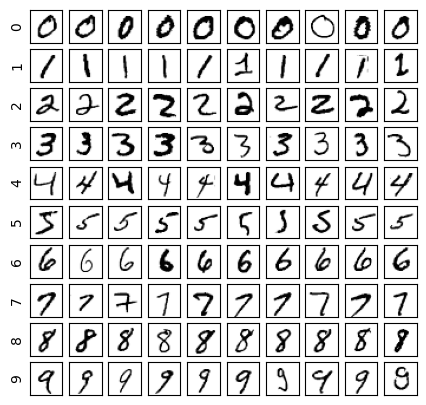

In [8]:
# 少し時間がかかります。
# 10行10列にグラフを分割
fig, ax = plt.subplots(10, 10, figsize=(5, 5))

for i in range(10):
    # ラベル
    ax[i, 0].set_ylabel(i)

    for j in range(10):
        # 行=i、列=jの位置に画像を描画する
        ax[i, j].imshow(images[i][j].reshape(28, 28), cmap='Greys')

        # 目盛を表示しない設定
        ax[i, j].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

plt.show()

## 4. データの前処理

In [9]:
# 形状の確認
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [10]:
# len関数を使い、X_trainを(X_trainの長さ, 28, 28, 1)にreshapeしてX_train2に代入
X_train2 = X_train.reshape(len(X_train), 28, 28, 1)

# len関数を使い、X_testを(X_testの長さ, 28, 28, 1)にreshapeしてX_test2に代入
X_test2 = X_test.reshape(len(X_test), 28, 28, 1)


In [11]:
# to_categoricalを使い、Y_trainをカテゴリー変数に展開してY_train2に代入
Y_train2 = to_categorical(Y_train)

# to_categoricalを使い、Y_testをカテゴリー変数に展開してY_test2に代入
Y_test2 = to_categorical(Y_test)


In [12]:
# 形状の確認
print(X_train2.shape)
print(Y_train2.shape)
print(X_test2.shape)
print(Y_test2.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [13]:
# train_test_splitを使いデータを7:3に分割
# 機械学習用データ(X_train2、Y_train2)を「X_train2, X_valid2, Y_train2, Y_valid2」に分割
X_train2, X_valid2, Y_train2, Y_valid2 = train_test_split(X_train2, Y_train2, test_size=0.3, random_state=0)


In [14]:
# データ(学習、検証、テスト)の形状を確認
print("X_train2=", X_train2.shape, ", Y_train2=", Y_train2.shape)
print("X_valid2=", X_valid2.shape, ", Y_valid2=", Y_valid2.shape)
print("X_test2=", X_test2.shape, ", Y_test2=", Y_test2.shape)

X_train2= (42000, 28, 28, 1) , Y_train2= (42000, 10)
X_valid2= (18000, 28, 28, 1) , Y_valid2= (18000, 10)
X_test2= (10000, 28, 28, 1) , Y_test2= (10000, 10)


## 5. モデルの構築

Kerasを使ってモデルを構築してみましょう。以下を条件とします

- CNN(Conv2D)を使うこと
- 正解率(accuracy)が50%以上であること

場合によっては、学習にものすごく時間がかかる場合もあります。適宜パラメータ数を調整して行ってください

In [15]:
# ライブラリのインポート
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [16]:
# モデルの初期化
model = keras.Sequential()

# ここにモデルを構築するコードを記述してください
model.add(Conv2D(16, kernel_size=3, padding="same",
                strides=1, input_shape=(28, 28, 1),
                activation="relu"))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))
# 構築
model.compile(optimizer = "rmsprop",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

2023-01-04 14:18:03.521642: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-04 14:18:03.522475: E tensorflow/stream_executor/cuda/cuda_driver.cc:313] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-04 14:18:03.523931: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ip-172-31-3-167): /proc/driver/nvidia/version does not exist
2023-01-04 14:18:03.529339: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2023-01-04 14:18:03.599876: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 2400000000 Hz
2023-01-04 14:18:03.603795: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f76a80013e0 initialized for platform Host (this does not guarantee

In [17]:
# モデルの構造を表示
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 16)                200720    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                170       
Total params: 201,050
Trainable params: 201,050
Non-trainable params: 0
_________________________________________________________________


In [18]:
%%time
# 学習を実施し、結果をlogで受け取る。EarlyStoppingを使用する
log = model.fit(X_train2, Y_train2, epochs=20, batch_size=100, verbose=True,
                callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss',
                                                        min_delta=0, patience=100,
                                                        verbose=1)],
        validation_data=(X_valid2, Y_valid2))

Epoch 1/20


2023-01-04 14:18:03.834397: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 32928000 exceeds 10% of free system memory.


  4/420 [..............................] - ETA: 12s - loss: 25.6670 - accuracy: 0.1075

2023-01-04 14:18:04.840216: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 11261376 exceeds 10% of free system memory.
2023-01-04 14:18:04.901151: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 11261376 exceeds 10% of free system memory.
2023-01-04 14:18:04.947903: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 11261376 exceeds 10% of free system memory.
2023-01-04 14:18:04.979845: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 11261376 exceeds 10% of free system memory.


420/420 [==============================] - 16s 38ms/step - loss: 1.5987 - accuracy: 0.5158 - val_loss: 0.5936 - val_accuracy: 0.7921
Epoch 2/20
420/420 [==============================] - 15s 37ms/step - loss: 0.3120 - accuracy: 0.9157 - val_loss: 0.1827 - val_accuracy: 0.9498
Epoch 3/20
420/420 [==============================] - 15s 37ms/step - loss: 0.1142 - accuracy: 0.9682 - val_loss: 0.1598 - val_accuracy: 0.9570
Epoch 4/20
420/420 [==============================] - 16s 37ms/step - loss: 0.0649 - accuracy: 0.9820 - val_loss: 0.1351 - val_accuracy: 0.9660
Epoch 5/20
420/420 [==============================] - 15s 37ms/step - loss: 0.0414 - accuracy: 0.9880 - val_loss: 0.1463 - val_accuracy: 0.9676
Epoch 6/20
420/420 [==============================] - 16s 37ms/step - loss: 0.0276 - accuracy: 0.9919 - val_loss: 0.1632 - val_accuracy: 0.9687
Epoch 7/20
420/420 [==============================] - 15s 36ms/step - loss: 0.0196 - accuracy: 0.9942 - val_loss: 0.1638 - val_accuracy: 0.9713
Epo

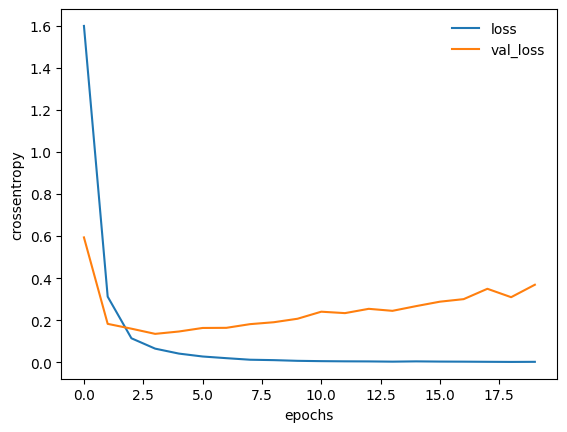

In [19]:
# 学習の課程をグラフで表示する
plt.plot(log.history['loss'], label='loss')
plt.plot(log.history['val_loss'], label='val_loss')
plt.legend(frameon=False)
plt.xlabel("epochs")
plt.ylabel("crossentropy")
plt.show()

## 6. テストデータによる評価

In [20]:
# 環境により、そのままX_test2を使うとエラーになる対策(float型に変換)
X_test2 = X_test2 * 1.0

In [21]:
# predictを使い、X_test2をもとに予測した結果をY_pred2に代入
Y_pred2 = np.argmax(model.predict(X_test2), axis=1)


In [22]:
# カテゴリー変数Y_test2を復元してY_test2_に代入
Y_test2_ = np.argmax(Y_test2, axis=1)


In [23]:
# classification_reportを使い、モデルの評価を実施
from sklearn.metrics import classification_report

print(classification_report(Y_test2_, Y_pred2))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.99      0.95      0.97       892
           6       0.98      0.97      0.98       958
           7       0.96      0.97      0.96      1028
           8       0.97      0.95      0.96       974
           9       0.96      0.97      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

